<a href="https://colab.research.google.com/github/kvnnn14/ML-Heart/blob/main/SC60515_Kevin_Alexsandro_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PENJELASAN KOLOM YANG ADA DI DATA

AGE – umur dalam tahun

SEX - (1 = Laki-laki ; 0 = perempuan)

CP - chest pain type (tipe nyeri dada)

1: Atypical angina (Angina atipikal): nyeri dada yang tidak berhubungan dengan jantung
2: Non-anginal pain (Nyeri non-angina): biasanya kejang esofagus (tidak berhubungan dengan jantung)
3 : Asymptomatic (Tanpa gejala): nyeri dada tidak menunjukkan tanda-tanda penyakit
TRESTBPS - tekanan darah istirahat (dalam mm Hg) di atas 130-140 biasanya menimbulkan kekhawatiran

CHOL - serum kolestoral dalam mg/dl

serum = LDL + HDL + .2 * trigliserida
di atas 200 memprihatinkan
FBS - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

126 mg/dL menandakan diabetes

RESTECG - resting electrocardiographic results (hasil elektrokardiografi istirahat)

0: Nothing to note (Tidak ada yang perlu diperhatikan)
1 : ST-T Wave abnormality (Kelainan Gelombang ST-T)
dapat berkisar dari gejala ringan hingga masalah parah
menandakan detak jantung tidak normal
2: Possible or definite left ventricular hypertrophy (Kemungkinan atau pasti hipertrofi ventrikel kiri)
Ruang pemompaan utama jantung membesar
THALACH - maximum heart rate achieved (detak jantung maksimum tercapai

EXANG - exercise induced angina (1 = yes; 0 = no)

OLDPEAK - Depresi ST yang disebabkan oleh olahraga dibandingkan dengan istirahat terlihat pada stres jantung saat berolahraga. Jantung yang tidak sehat akan lebih stres

SLOPE - kemiringan puncak latihan segmen ST

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
CA - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

THAL - thalium stress result (hasil stres talium)

1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising


TARGET - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### DATA LOADING, EDA & PREPROCESSING

In [ ]:
url ="https://raw.githubusercontent.com/kvnnn14/ML-Heart/main/heart.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# cek kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Check Distribution of Target Class
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
# Ubah daftar kolom menjadi kategorikal
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

In [ ]:
# Pisahkan numerical dan categorical
numerical_col = df.select_dtypes(exclude=np.object_)
categorical_col = df.select_dtypes(exclude=np.number)

In [ ]:
# jumlah null values di kolom dataset heart
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Memeriksa duplikat data
df.duplicated().sum()

723

terdapat 723 duplicate values pada dataset, dan perlu dilakukan penghapusan/pemfilteran untuk mencegah terjadinya data yang menumpuk dan berganda

In [ ]:
# Menghapus duplicates values
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


berdasarkan output diatas dengan menghapus duplicate values, maka nilai yang sebelumnya sebanyak 723 menjadi 302, sebanyak 421 data duplikat yang telah dihapus

In [ ]:
# OUTLIER
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


Berdasarkan output di atas kita dapat melihat ada perbedaan besar dalam chol 75% hingga max (274.75 hingga 564.0) demikian pula kita dapat melihat di thalch, trestbps, oldpeak sehingga mengindikasikan adanya outlier.

In [ ]:
# MENGHAPUS OUTLIER JIKA PERLU
continuous_features = ['trestbps','chol','thalach','oldpeak']

def remove_outliers(df, continuous_features):
    for feature in continuous_features:
        # Calculate the 25th and 75th percentiles (Q1 and Q3)
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # Define the outlier step
        outlier_step = 1.5 * IQR
        # tentukan outlier
        outliers = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]
        # hapus outlier dari dataframe
        df = df[~df.isin(outliers)].dropna()
        # print nomor outlier yang terdeteksi lalu hapus
        print('Jumlah outliers yang terhitung dan dihapus dari {} feature: {}'.format(feature, outliers.shape[0]))

    return df

# hapus outlier dari dataset
df_clean = remove_outliers(df, continuous_features)
df_clean

# syntax dari sumber pembelajaran

Jumlah outliers yang terhitung dan dihapus dari trestbps feature: 9
Jumlah outliers yang terhitung dan dihapus dari chol feature: 5
Jumlah outliers yang terhitung dan dihapus dari thalach feature: 1
Jumlah outliers yang terhitung dan dihapus dari oldpeak feature: 4


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0.0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0.0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0.0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0.0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0,2,120.0,211.0,0,0,115.0,0,1.5,1,0,2,1.0
733,44.0,0,2,108.0,141.0,0,1,175.0,0,0.6,1,0,2,1.0
739,52.0,1,0,128.0,255.0,0,1,161.0,1,0.0,2,1,3,0.0
843,59.0,1,3,160.0,273.0,0,0,125.0,0,0.0,2,0,2,0.0


setelah mengetahui kolom yang terindikasi memiliki outlier, maka selanjutnya melakukan penghapusan outlier seperti pada output diatas, dengan nilai data awalnya 302 menjadi 283

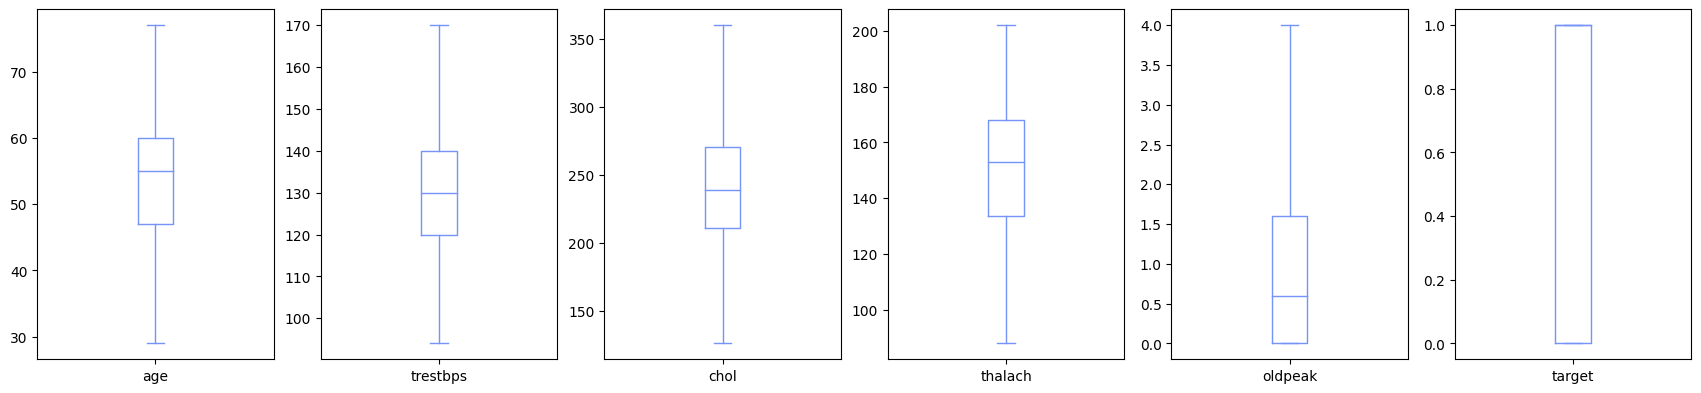

In [ ]:
# visualisasi boxplot untuk cek outlier kembali setelah melakukan penghapusan
df_clean.plot(kind = 'box', subplots = True, layout = (2,7),
sharex = False, sharey = False, figsize = (25, 10), color = '#7593F8');

Berdasarkan boxplot diatas terlihat bahwa outlier pada kolom trestbps, chol, thalach, dan oldpeak telah dihapus

Text(0.5, 1.0, 'Correlation Between Features')

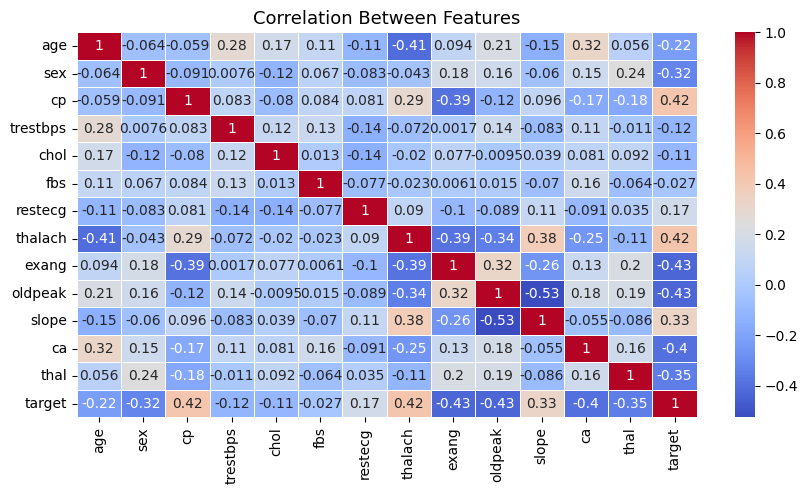

In [ ]:
# Memeriksa korelasi antar feature
plt.figure(figsize=(10,5))
cor=df_clean.corr()
sns.heatmap(cor,annot=True, linewidths = 0.5, cmap = "coolwarm")
plt.title('Correlation Between Features' , fontsize = 13)

Korelasi positif tertinggi terlihat: cp dan target (0,42) thalach dan target (0,42) thalach dan slope (0,38)

Korelasi negatif tertinggi terlihat: oldpeak dan slope (-0,53) oldpeak dan target (-0,43) exang dan target (-0,43)

In [ ]:
cor_matrix = df_clean.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.064118,-0.058687,0.282669,0.171015,0.106885,-0.110517,-0.411108,0.093718,0.209254,-0.149095,0.320589,0.055908,-0.222416
sex,-0.064118,1.000000,-0.091357,0.007572,-0.123863,0.066692,-0.083290,-0.042981,0.182596,0.157352,-0.060014,0.150209,0.243271,-0.318896
cp,-0.058687,-0.091357,1.000000,0.083242,-0.080369,0.084389,0.080836,0.285605,-0.388610,-0.122582,0.095881,-0.171717,-0.179204,0.416319
trestbps,0.282669,0.007572,0.083242,1.000000,0.115138,0.127221,-0.139228,-0.071600,0.001726,0.144438,-0.083024,0.105458,-0.011026,-0.115614
chol,0.171015,-0.123863,-0.080369,0.115138,1.000000,0.013066,-0.142285,-0.020128,0.076547,-0.009534,0.039352,0.081070,0.091667,-0.105627
fbs,0.106885,0.066692,0.084389,0.127221,0.013066,1.000000,-0.077417,-0.023484,0.006080,0.015070,-0.069563,0.156265,-0.064469,-0.027210
restecg,-0.110517,-0.083290,0.080836,-0.139228,-0.142285,-0.077417,1.000000,0.089556,-0.104440,-0.089255,0.111841,-0.091123,0.034684,0.171453
thalach,-0.411108,-0.042981,0.285605,-0.071600,-0.020128,-0.023484,0.089556,1.000000,-0.387726,-0.341190,0.376494,-0.253937,-0.112838,0.422559
exang,0.093718,0.182596,-0.388610,0.001726,0.076547,0.006080,-0.104440,-0.387726,1.000000,0.318620,-0.259780,0.133820,0.202806,-0.431599
oldpeak,0.209254,0.157352,-0.122582,0.144438,-0.009534,0.015070,-0.089255,-0.341190,0.318620,1.000000,-0.525142,0.179032,0.189822,-0.434108


### MODEL MACHINE LEARNING

machine learning menggunakan model Decision Tree dan Random Forest, tiap model akan digunakan cross validation dan bootstrapping. Random Forest dan Decision Tree cocok untuk melakukan klasifikasi pada data heart disease karena model ini dapat memetakan pola dan hubungan antara variabel independen dengan variabel target

In [ ]:
# Memisahkan variabel dependen dan independen
X = df_clean.drop("target", axis=1)
y = df_clean['target']

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (240,)
Test Size  :  (43,)


berdasarkan output diatas, kita telah melakukan pembagian data menjadi data train dan data test dengan data train sebanyak 240, dan data test sebanyak 43 dari keseluruhan total data 283 (80:20)

In [ ]:
# Check Class Distribution in Test-Set

import numpy as np
np.array(np.unique(y_test, return_counts=True)).T

array([[ 0., 20.],
       [ 1., 23.]])

In [ ]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### MODEL DECISSION TREE

In [ ]:
# MODEL DECISSION TREE
from sklearn.tree import DecisionTreeClassifier # model fitting dan prediksi
from sklearn.metrics import classification_report, confusion_matrix # mengecek performa dari model

model_tree = DecisionTreeClassifier().fit(X_train_scaled, y_train)

# Model Prediction - TRAIN SET
y_pred_train_tree = model_tree.predict(X_train_scaled)
y_pred_test_tree = model_tree.predict(X_test_scaled)

cm_train = confusion_matrix(y_train, y_pred_train_tree)
print('Confusion Matrix : \n', cm_train)

Confusion Matrix : 
 [[105   0]
 [  0 135]]


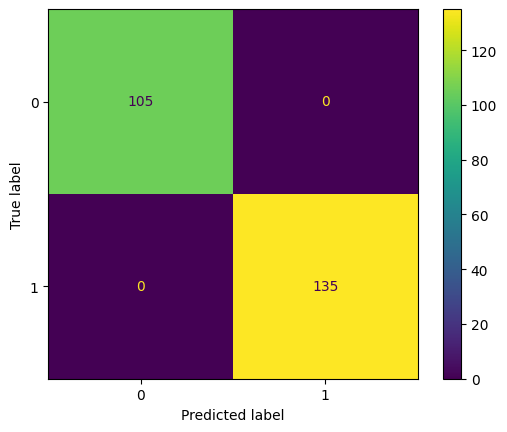

In [ ]:
# Confusion Matrix Display - TRAIN SET

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm_train).plot()

berdasarkan confusion metric pada data training, dapat dilihat bahwa 105 model berhasil menebak hasil true positive(orang yang benar memiliki penyakit jantung), dan sebanyak 135 model berhasil menebak hasil true negatif(iya atau bukan orang yang memiliki penyakit jantung)

In [ ]:
# Model Evaluation - TRAIN SET
print(classification_report(y_train, y_pred_train_tree))

print('Precision : ', precision_score(y_train, y_pred_train_tree))
print('Recall    : ', recall_score(y_train, y_pred_train_tree))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       105
         1.0       1.00      1.00      1.00       135

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Precision :  1.0
Recall    :  1.0


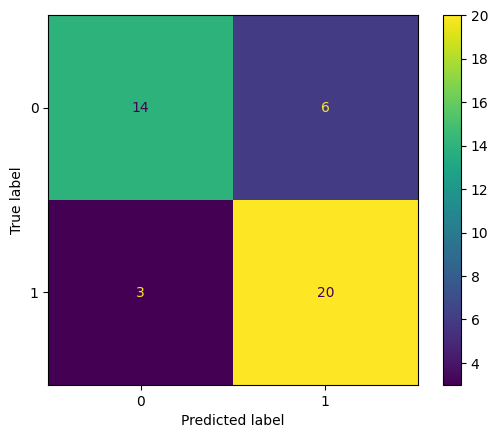

In [ ]:
# Confusion Matrix - TEST SET
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_pred_test_tree)
ConfusionMatrixDisplay(cm_test).plot()

berdasarkan confusion metric pada data testing, dapat dilihat terdapat 14 model berhasil menebak true positive(orang yang benar memiliki penyakit jantung) dengan false positif sebanyak 3 model, dan sebanyak 6 model berhasil menebak false negatif(orang yang ditebak tidak memiliki penyakit jantung tetapi sebenarnya punya "type2error") dengan true negative sebanyak 20 model

In [ ]:
# Model Evaluation - TEST SET
print(classification_report(y_test, y_pred_test_tree))

# Get Precision Score and Recall Score
print('Precision : ', precision_score(y_test, y_pred_test_tree))
print('Recall    : ', recall_score(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76        20
         1.0       0.77      0.87      0.82        23

    accuracy                           0.79        43
   macro avg       0.80      0.78      0.79        43
weighted avg       0.79      0.79      0.79        43

Precision :  0.7692307692307693
Recall    :  0.8695652173913043


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train_tree)
accuracy_test = accuracy_score(y_test, y_pred_test_tree)
print(f'Accuracy train yang didapatkan dari Decession Tree: {accuracy_train:.3f}')
print(f'Accuracy test yang didapatkan dari Decession Tree: {accuracy_test:.3f}')

Accuracy train yang didapatkan dari Decession Tree: 1.000
Accuracy test yang didapatkan dari Decession Tree: 0.791


Jadi dapat terlihat pada report akurasi yang dihasilkan dari model Decission Tree cukup baik hampir menyentuh angka 80% walau akurasi ini tidak terlalu bagus dimana akurasi yang baik biasanya akan menghasilkan diatas 90%

##### MODEL RANDOM FOREST

In [ ]:
# MODEL RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier # model fitting dan prediksi
from sklearn.metrics import classification_report, confusion_matrix # mengecek performa dari model

model_rf = RandomForestClassifier().fit(X_train_scaled, y_train)

# Model Prediction - TRAIN SET
y_pred_train_rf = model_rf.predict(X_train_scaled)
y_pred_test_rf = model_rf.predict(X_test_scaled)

cm_rf_train = confusion_matrix(y_train, y_pred_train_rf)
print('Confusion Matrix : \n', cm_rf_train)

Confusion Matrix : 
 [[105   0]
 [  0 135]]


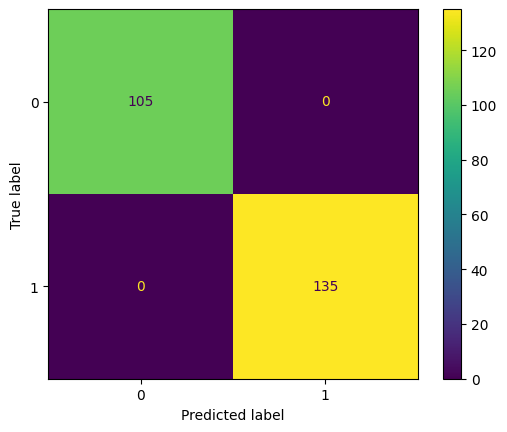

In [ ]:
# Confusion Matrix Display

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm_rf_train).plot()

berdasarkan confusion metric pada data training, dapat dilihat bahwa 105 model berhasil menebak hasil true positive(orang yang benar memiliki penyakit jantung), dan sebanyak 135 model berhasil menebak hasil true negatif(iya atau bukan orang yang memiliki penyakit jantung)

In [ ]:
# Model Evaluation - TEST SET
print(classification_report(y_train, y_pred_train_rf))

# Get Precision Score and Recall Score
print('Precision : ', precision_score(y_train, y_pred_train_rf))
print('Recall    : ', recall_score(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       105
         1.0       1.00      1.00      1.00       135

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Precision :  1.0
Recall    :  1.0


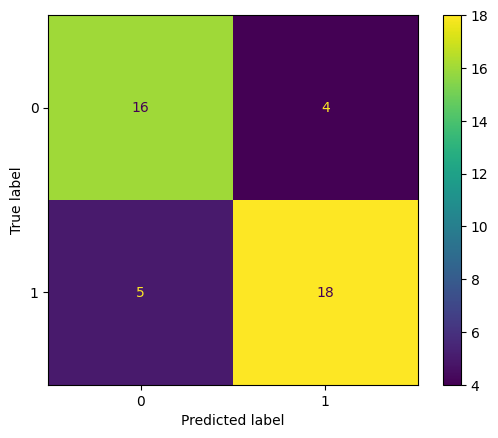

In [ ]:
# Confusion Matrix - TEST SET
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_rf_test = confusion_matrix(y_test, y_pred_test_rf)
ConfusionMatrixDisplay(cm_rf_test).plot()

berdasarkan confusion metric pada data testing, dapat dilihat terdapat 14 model berhasil menebak true positive(orang yang benar memiliki penyakit jantung) dengan false positif sebanyak 2 model, dan sebanyak 6 model berhasil menebak false negatif(orang yang ditebak tidak memiliki penyakit jantung tetapi sebenarnya punya "type2error") dengan true negative sebanyak 21 model

In [ ]:
# Get Precision Score and Recall Score - TEST SET

from sklearn.metrics import precision_score, recall_score

print('Precision : ', precision_score(y_test, y_pred_test_rf))
print('Recall    : ', recall_score(y_test, y_pred_test_rf))

Precision :  0.8181818181818182
Recall    :  0.782608695652174


In [ ]:
# Model Evaluation - TEST SET
print(classification_report(y_test, y_pred_test_rf))

# Get Precision Score and Recall Score
print('Precision : ', precision_score(y_test, y_pred_test_rf))
print('Recall    : ', recall_score(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78        20
         1.0       0.82      0.78      0.80        23

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.79      0.79      0.79        43

Precision :  0.8181818181818182
Recall    :  0.782608695652174


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(f'Accuracy train yang didapatkan dari Random Forest: {accuracy_train_rf:.5f}')
print(f'Accuracy test yang didapatkan dari Random Forest: {accuracy_test_rf:.5f}')

Accuracy train yang didapatkan dari Random Forest: 1.00000
Accuracy test yang didapatkan dari Random Forest: 0.79070


akurasi model dalam memprediksi adanya orang yang memiliki penyakit jantung pada data test yaitu 0.81 atau 81% . Dalam konteks ini, artinya model berhasil memprediksi 81% dari total dengan benar, baik itu review positif maupun negatif

### CROSS VALIDATION

In [ ]:
# CROSS VALIDATION DECISSION TREE:

# Evaluasi model dengan K-Fold Validation
scores_train = cross_val_score(model_tree, X_train_scaled, y_train, cv=5)
scores_test = cross_val_score(model_tree, X_test_scaled, y_test, cv=5)

# Melihat performa dalam akurasi
print("Akurasi Decission Tree di data train dengan menggunakan cross-validation: %.2f dengan standard deviation %.2f" % (scores_train.mean(), scores_train.std()))
print("Akurasi Decission Tree di data test dengan menggunakan cross-validation: %.2f dengan standard deviation %.2f" % (scores_test.mean(), scores_test.std()))

Akurasi Decission Tree di data train dengan menggunakan cross-validation: 0.72 dengan standard deviation 0.09
Akurasi Decission Tree di data test dengan menggunakan cross-validation: 0.82 dengan standard deviation 0.17


In [ ]:
# CROSS VALIDATION RANDOMFOREST:

# Evaluasi model dengan K-Fold Validation
scores_train_rf = cross_val_score(model_rf, X_train_scaled, y_train, cv=5)
scores_test_rf = cross_val_score(model_rf, X_test_scaled, y_test, cv=5)

# Melihat performa dalam akurasi
print("Akurasi Random Forest di data train dengan menggunakan cross-validation: %.2f dengan standard deviation %.2f" % (scores_train_rf.mean(), scores_train_rf.std()))
print("Akurasi Random Forest di semua data dengan menggunakan cross-validation: %.2f dengan standard deviation %.2f" % (scores_test_rf.mean(), scores_test_rf.std()))

Akurasi Random Forest di data train dengan menggunakan cross-validation: 0.82 dengan standard deviation 0.08
Akurasi Random Forest di semua data dengan menggunakan cross-validation: 0.79 dengan standard deviation 0.19


### LEARNING CURVES

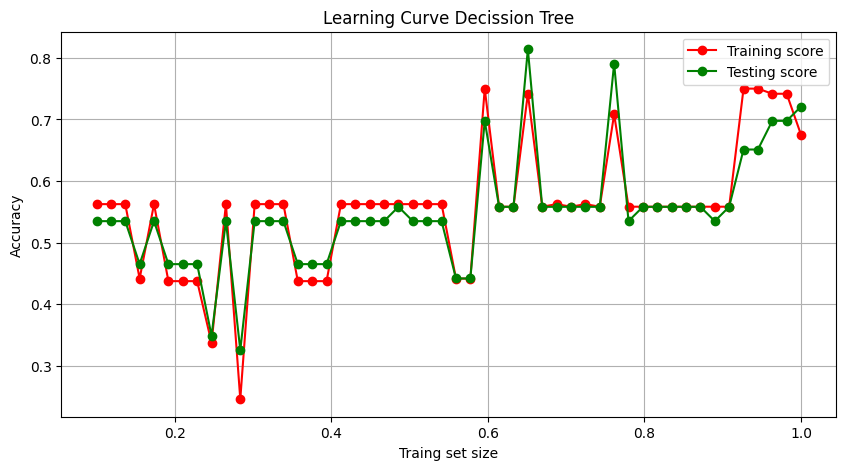

In [ ]:
# used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train =[]
learning_curve_test = []

clf_tree = DecisionTreeClassifier(random_state=42)

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train_scaled))
    X_subset = X_train_scaled[:num_samples]
    y_subset = y_train[:num_samples]

    clf_tree.fit(X_subset, y_subset)

    y_pred_train_tree = clf_tree.predict(X_train)
    acc_train_tree = accuracy_score(y_train, y_pred_train_tree)
    learning_curve_train.append(acc_train_tree)

    y_pred_test_tree = clf_tree.predict(X_test)
    acc_test_tree = accuracy_score(y_test, y_pred_test_tree)
    learning_curve_test.append(acc_test_tree)

# plot learning curve
plt.figure(figsize=(10,5))
plt.title('Learning Curve Decission Tree')
plt.xlabel('Traing set size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label='Training score')
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label='Testing score')
plt.legend(loc="best")
plt.show()

Dapat dilihat pada output dari learning curve decision tree, bahwa data testing dengan data training memiliki jarak yang berdekatan, namun data testing belum mencapai data training, namun model decission tree ini memiliki learning curve yang good fit

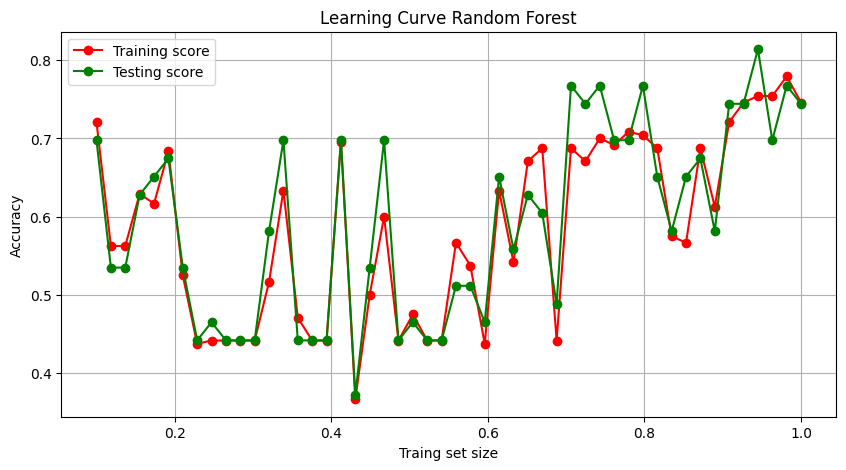

In [ ]:
# LEARNING CURVES RANDOM FOREST
# used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train =[]
learning_curve_test = []

clf = RandomForestClassifier(n_estimators=100, random_state=42)

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train_scaled))
    X_subset = X_train_scaled[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train_rf = clf.predict(X_train)
    acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
    learning_curve_train.append(acc_train_rf)

    y_pred_test_rf = clf.predict(X_test)
    acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
    learning_curve_test.append(acc_test_rf)

# plot learning curve
plt.figure(figsize=(10,5))
plt.title('Learning Curve Random Forest')
plt.xlabel('Traing set size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label='Training score')
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label='Testing score')
plt.legend(loc="best")
plt.show()

Dapat dilihat pada output dari learning curve random forest memiliki perbedaan dengan learning curve decision tree, dimana data testing dengan data training memiliki jarak yang berdekatan, namun model decission tree ini memiliki learning curve yang good fit

### BOOTSTRAPPING

In [ ]:
# MODEL RANDOM FOREST:
from sklearn.utils import resample

# Gunakan bootstrap untuk memperkirakan keakuratan model
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Sampel data dengan penggantian
    X_boost, y_boost = resample(X_train_scaled, y_train)
    # Latih model pada sampel bootstrap
    model_rf.fit(X_boost, y_boost)
    # Evaluasi model pada seluruh kumpulan data
    y_pred_test_rf = model_rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_test_rf)
    accuracies.append(accuracy)

# Hitung mean dan interval dari akurasi
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean akurasi Random Forest dengan bootstrapping: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

# code syntax berasal dari sumber pembelajaran

Mean akurasi Random Forest dengan bootstrapping: 0.79
95% confidence interval: [0.71, 0.87]


In [ ]:
# MODEL DECISSION TREE:

from sklearn.utils import resample

# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    X_boost, y_boost = resample(X_train_scaled, y_train)
    # Train the model on the bootstrap sample
    model_tree.fit(X_boost, y_boost)
    # Evaluate the model on the entire dataset
    y_pred_test_tree = model_tree.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_test_tree)
    accuracies.append(accuracy)


# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean akurasi Decssion Tree dengan bootstrapping: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean akurasi Decssion Tree dengan bootstrapping: 0.73
95% confidence interval: [0.61, 0.84]


Insight :

Penggunaan random forest ternyata menghasilkan akurasi yang lebih baik bila dibandingkan dengan decission tree dimana pada random forest dihasilkan yaitu akurasi baseline 76% dan presisi 76% dengan menggunakan cross validation adalah 84% dan penggunaan bootrapping menghasilkan akurasi 78%

numpy as np
pandas as pd
